In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

import os

In [2]:
# target data
matchStats_file_path = os.getcwd()[:-4] + '\\csvData\\stats\\matchStats.csv'
matchStats_data = pd.read_csv(matchStats_file_path)
matchStats_data

,match_id,team_id,fouls,injuries,corners,offsides,shots_total,shots_on_target,shots_off_target,shots_blocked,...,substitutions,goal_kick,goal_attempts,free_kick,throw_in,ball_safe,goals,penalties,attacks,dangerous_attacks
0,25230,1035,10.0,1.0,7,2,11,3.0,3.0,5.0,...,3,6,6,10,25,0,2,0/1,0,0
1,25230,1052,9.0,0.0,5,1,9,4.0,2.0,3.0,...,3,7,6,12,20,0,3,0/0,0,0
2,25231,1047,20.0,0.0,5,1,8,3.0,2.0,3.0,...,2,16,5,7,24,0,1,0/0,0,0
3,25231,1040,7.0,1.0,7,0,18,3.0,8.0,7.0,...,1,4,11,21,30,0,1,0/0,0,0
4,25232,1038,8.0,2.0,7,2,22,11.0,8.0,3.0,...,3,15,19,8,17,0,4,0/0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,30198,2214,15.0,2.0,3,1,6,4.0,2.0,0.0,...,3,12,6,14,18,0,1,0/0,0,0
12220,30199,2222,19.0,3.0,6,1,22,7.0,12.0,3.0,...,3,8,19,24,16,0,1,0/0,0,0
12221,30199,2213,24.0,0.0,4,0,14,6.0,7.0,1.0,...,2,13,13,20,15,0,2,0/0,0,0
12222,30200,870,15.0,4.0,7,0,19,6.0,8.0,5.0,...,3,3,14,16,18,0,1,1/1,0,0


In [3]:
df = pd.read_csv(matchStats_file_path)
# matchStats_data = matchStats_data.iloc[1:]
df = df.drop(['match_id', 'team_id'], axis=1)
df.dropna()
# df.isnull().sum()
# df

,fouls,injuries,corners,offsides,shots_total,shots_on_target,shots_off_target,shots_blocked,possessionpercent,yellowcards,...,substitutions,goal_kick,goal_attempts,free_kick,throw_in,ball_safe,goals,penalties,attacks,dangerous_attacks
0,10.0,1.0,7,2,11,3.0,3.0,5.0,52,1,...,3,6,6,10,25,0,2,0/1,0,0
1,9.0,0.0,5,1,9,4.0,2.0,3.0,48,0,...,3,7,6,12,20,0,3,0/0,0,0
2,20.0,0.0,5,1,8,3.0,2.0,3.0,45,1,...,2,16,5,7,24,0,1,0/0,0,0
3,7.0,1.0,7,0,18,3.0,8.0,7.0,55,1,...,1,4,11,21,30,0,1,0/0,0,0
4,8.0,2.0,7,2,22,11.0,8.0,3.0,51,1,...,3,15,19,8,17,0,4,0/0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,15.0,2.0,3,1,6,4.0,2.0,0.0,48,1,...,3,12,6,14,18,0,1,0/0,0,0
12220,19.0,3.0,6,1,22,7.0,12.0,3.0,49,1,...,3,8,19,24,16,0,1,0/0,0,0
12221,24.0,0.0,4,0,14,6.0,7.0,1.0,51,3,...,2,13,13,20,15,0,2,0/0,0,0
12222,15.0,4.0,7,0,19,6.0,8.0,5.0,55,2,...,3,3,14,16,18,0,1,1/1,0,0


In [4]:
# df = df.drop('goals', axis = 1).copy()
# X = X.drop(['fouls','injuries', 'shots_on_target', 'shots_off_target', 'shots_blocked'], axis = 1).copy()
# df = df.drop(['fouls','injuries', 'shots_on_target', 'shots_off_target', 'shots_blocked', 'offsides', 'penalties'], axis = 1).copy()
# new = old.filter(['A','B','D'], axis=1)
# df = df.filter(['corners', 'goal_attempts', 'penalties', 'goals'], axis=1)
df = df.filter(['offsides', 'yellowcards', 'corners', 'redcards', 'goal_kick', 'penalties', 'goals'], axis=1)
# corners redcards
# 'injuries', 'corners', 'offsides', 
#           'shots_on_target', 'shots_blocked',
#           'yellowcards', 'yellowredcards', 'redcards', 'goal_kick'
        
# X = df['corners', 'shots_total', 'shots_total', 'goal_attempts', 'penalties'].copy()
df

,offsides,yellowcards,corners,redcards,goal_kick,penalties,goals
0,2,1,7,0,6,0/1,2
1,1,0,5,0,7,0/0,3
2,1,1,5,0,16,0/0,1
3,0,1,7,0,4,0/0,1
4,2,1,7,0,15,0/0,4
...,...,...,...,...,...,...,...
12219,1,1,3,0,12,0/0,1
12220,1,1,6,0,8,0/0,1
12221,0,3,4,0,13,0/0,2
12222,0,2,7,0,3,1/1,1


In [5]:
df_less_than_one = df[df['goals'] <= 1]
df_more_than_one = df[df['goals'] > 1]

In [6]:
df_less_than_one_downsampled = resample(df_less_than_one,
                                        replace=False,
                                       n_samples=1000,
                                       random_state=42)
df_less_than_one_downsampled

,offsides,yellowcards,corners,redcards,goal_kick,penalties,goals
9442,7,4,2,0,9,0/0,0
1656,1,1,4,0,8,0,0
4273,0,1,0,0,0,0,0
4229,0,0,0,0,0,0,1
6138,5,1,6,0,6,0/0,1
...,...,...,...,...,...,...,...
3728,4,1,6,0,7,0,0
5212,2,0,3,0,10,0/0,0
724,2,1,2,0,9,0,0
9038,5,0,1,0,11,0/0,0


In [7]:
df_more_than_one_downsampled = resample(df_more_than_one,
                                        replace=False,
                                       n_samples=1000,
                                       random_state=42)
df_more_than_one_downsampled

,offsides,yellowcards,corners,redcards,goal_kick,penalties,goals
4161,0,3,7,0,0,0,2
9036,2,2,3,0,13,0/0,3
11275,1,2,4,0,8,0/0,3
1610,1,2,5,0,7,0,2
9798,4,2,2,0,17,0/0,2
...,...,...,...,...,...,...,...
4829,0,0,0,0,0,0,5
1214,2,1,3,0,11,0,3
12176,2,3,7,0,11,1/1,2
9892,1,3,7,0,4,0/0,2


In [8]:
df_downsample = pd.concat([df_less_than_one_downsampled, df_more_than_one_downsampled])
df_downsample

,offsides,yellowcards,corners,redcards,goal_kick,penalties,goals
9442,7,4,2,0,9,0/0,0
1656,1,1,4,0,8,0,0
4273,0,1,0,0,0,0,0
4229,0,0,0,0,0,0,1
6138,5,1,6,0,6,0/0,1
...,...,...,...,...,...,...,...
4829,0,0,0,0,0,0,5
1214,2,1,3,0,11,0,3
12176,2,3,7,0,11,1/1,2
9892,1,3,7,0,4,0/0,2


In [9]:
X = df_downsample.drop('goals', axis=1).copy()

In [10]:
X_encoded = pd.get_dummies(X, columns=['penalties'])
X_encoded.head()

,offsides,yellowcards,corners,redcards,goal_kick,penalties_0,penalties_0/0,penalties_0/1,penalties_1,penalties_1/1,penalties_1/2,penalties_2,penalties_2/2
9442,7,4,2,0,9,0,1,0,0,0,0,0,0
1656,1,1,4,0,8,1,0,0,0,0,0,0,0
4273,0,1,0,0,0,1,0,0,0,0,0,0,0
4229,0,0,0,0,0,1,0,0,0,0,0,0,0
6138,5,1,6,0,6,0,1,0,0,0,0,0,0


In [11]:
y = df_downsample['goals'].copy()
y

9442     0
1656     0
4273     0
4229     1
6138     1
        ..
4829     5
1214     3
12176    2
9892     2
6984     2
Name: goals, Length: 2000, dtype: int64

In [12]:
y_more_than_one_goals = y > 1
y_less_than_one_goals = y <= 1

y[y_more_than_one_goals] = 1
y[y_less_than_one_goals] = 0

y

9442     0
1656     0
4273     0
4229     0
6138     0
        ..
4829     1
1214     1
12176    1
9892     1
6984     1
Name: goals, Length: 2000, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

array([[-0.15949111,  0.09852205,  1.21522783, ..., -0.06337243,
        -0.0365392 , -0.08595062],
       [-0.84107704,  0.86029048, -0.08983159, ..., -0.06337243,
        -0.0365392 , -0.08595062],
       [-0.84107704, -0.66324638,  1.54149268, ..., -0.06337243,
        -0.0365392 , -0.08595062],
       ...,
       [-0.15949111,  0.86029048, -0.7423613 , ..., -0.06337243,
        -0.0365392 , -0.08595062],
       [ 0.52209482, -0.66324638,  0.56269812, ..., -0.06337243,
        -0.0365392 , -0.08595062],
       [ 3.24843856,  0.09852205,  0.56269812, ..., -0.06337243,
        -0.0365392 , -0.08595062]])

In [14]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

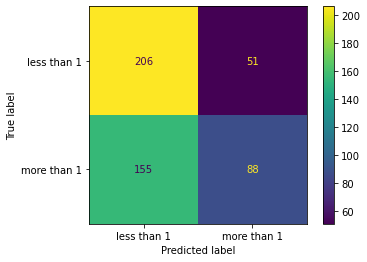

In [15]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test,
                     values_format='d',
                     display_labels=['less than 1', 'more than 1'])

In [16]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             verbose=0)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [23]:
clf_svm = SVC(random_state=42, C=100, gamma='scale')
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, random_state=42)

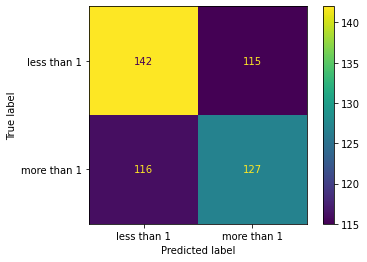

In [24]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test,
                     values_format='d',
                     display_labels=['less than 1', 'more than 1'])

In [19]:
len(df_downsample.columns)

7

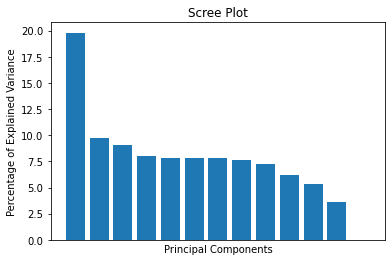

In [20]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [21]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [
    {'C': [1, 10, 100, 1000],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             verbose=0)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


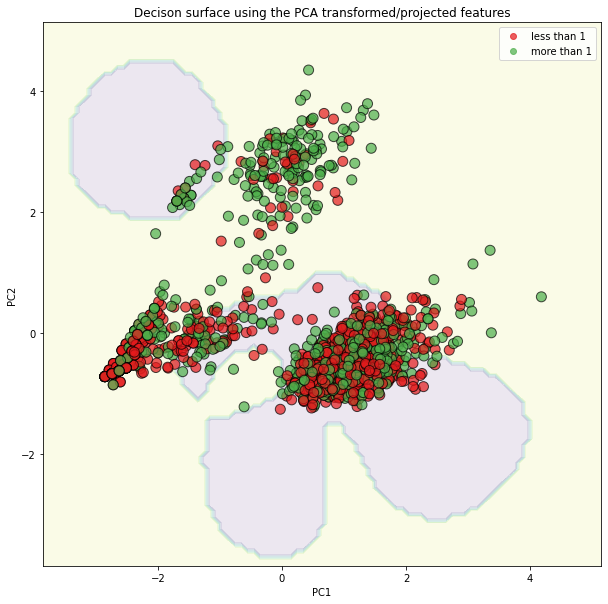

In [22]:
clf_svm = SVC(random_state=42, C=1000, gamma='scale')
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]


x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc1_coords.min() - 1
y_max = test_pc1_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
                    cmap=cmap,
                    s=100,
                    edgecolors='k',
                    alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc='upper right')

legend.get_texts()[0].set_text("less than 1")
legend.get_texts()[1].set_text("more than 1")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')

plt.show()